# Show training curve of Faster R-CNN on KITTI



In [7]:
import os
os.chdir('../faster-rcnn-kitti/caffe-fast-rcnn')

In [8]:
import sys
sys.path.insert(0, './python')
import caffe

from pylab import *
%matplotlib inline
os.chdir('../tools')
import _init_paths
from fast_rcnn.config import cfg 

We are in faster rcnn root folder now, we are gonna read train information

In [44]:
import re
train_log_name = 'faster_rcnn_end2end_VGG_CNN_M_1024_.txt.2016-05-22_20-54-27'
train_log_path = os.path.join(cfg.ROOT_DIR, 'experiments/logs', train_log_name)

pattern = 'Iteration [0-9]+, loss = [0-9\.]+'

f = open(train_log_path)
lines = f.readlines();

iter = []
train_loss = []
ix = 0
for line in lines:
    #print line    
    matchObj = re.search(pattern, line, flags=0)
    if matchObj:        
        #print(matchObj.group())
        temp = matchObj.group().split(',')
        iter.append(int(temp[0].split()[1]))
        train_loss.append(float(temp[1].split()[2]))
        
        #print(Iter)
        #print(Loss)
niter = len(iter)
print(niter)
    

200


In [46]:
"""parse test accuracy"""

os.chdir('..')
import subprocess

# may use subprocess.check_output instead
test_iter = ['2000', '4000', '6000', '8000', '10000']
test_ap = []

for obj in test_iter:
    with open('out3.txt', 'w') as logfile:
        subprocess.call(['./test_iter.sh', obj], stdout=logfile, shell=False)
    
    f = open('out3.txt')
    lines = f.readlines();
    
    for line in lines:
        print(line)
        matchObj = re.search('AP for Car = [0-9\.]+', line, flags=0)
        if matchObj:
            test_ap.append(float(matchObj.group().split()[4]))

test_iter = [2000, 4000, 6000, 8000, 10000]

SyntaxError: invalid syntax (<ipython-input-46-10b293ae5828>, line 5)

Let's plot the train loss and test accuracy.

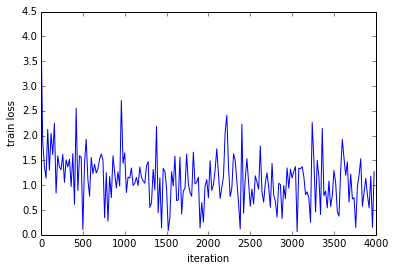

In [43]:
_, ax1 = subplots()
#ax2 = ax1.twinx()
ax1.plot(iter, train_loss)
#ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
#ax2.set_ylabel('test accuracy')

The loss seems to have dropped quickly and coverged (except for stochasticity), while the accuracy rose correspondingly. Hooray!

Since we saved the results on the first test batch, we can watch how our prediction scores evolved. We'll plot time on the $x$ axis and each possible label on the $y$, with lightness indicating confidence.

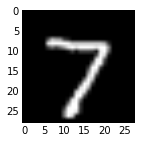

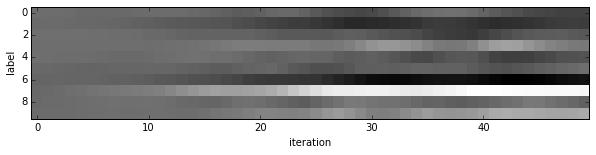

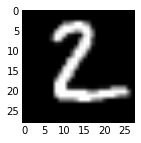

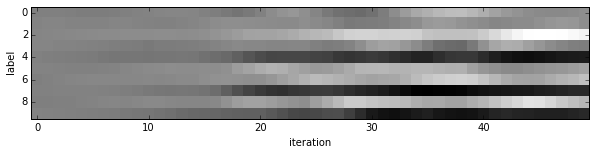

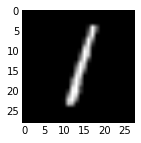

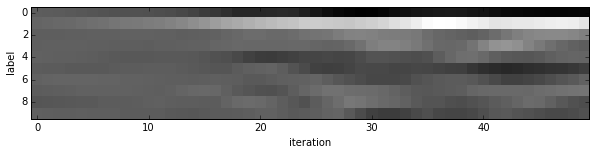

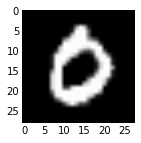

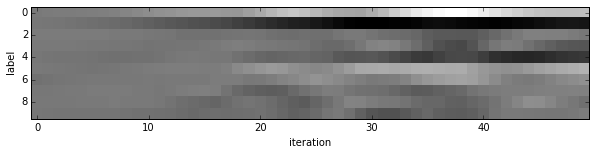

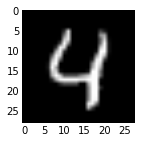

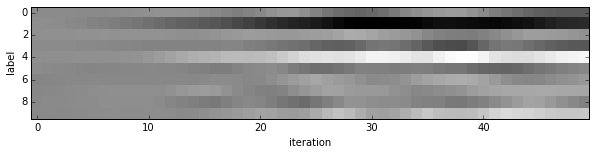

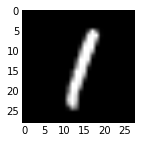

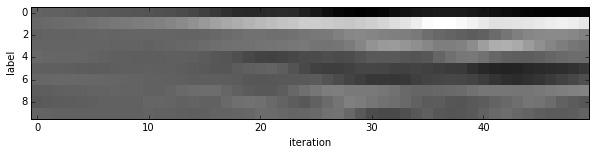

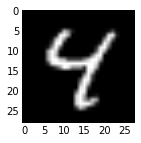

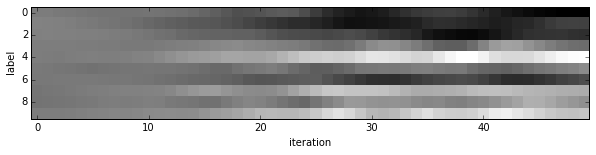

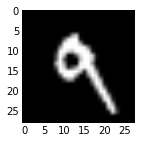

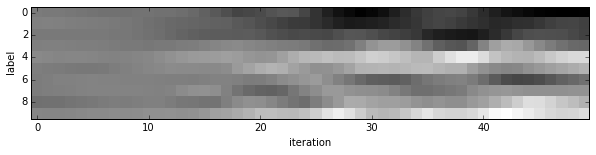

In [17]:
for i in range(8):
    figure(figsize=(2, 2))
    imshow(solver.test_nets[0].blobs['data'].data[i, 0], cmap='gray')
    figure(figsize=(10, 2))
    imshow(output[:50, i].T, interpolation='nearest', cmap='gray')
    xlabel('iteration')
    ylabel('label')

We started with little idea about any of these digits, and ended up with correct classifications for each. If you've been following along, you'll see the last digit is the most difficult, a slanted "9" that's (understandably) most confused with "4".

Note that these are the "raw" output scores rather than the softmax-computed probability vectors. The latter, shown below, make it easier to see the confidence of our net (but harder to see the scores for less likely digits).

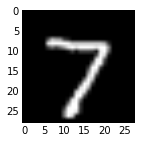

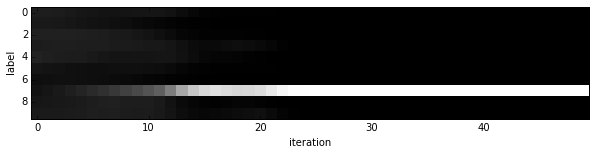

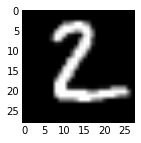

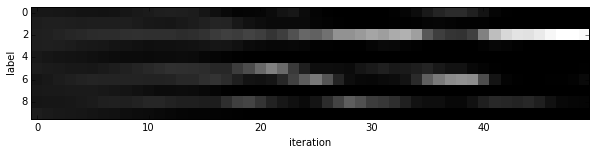

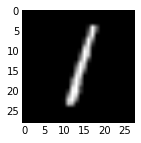

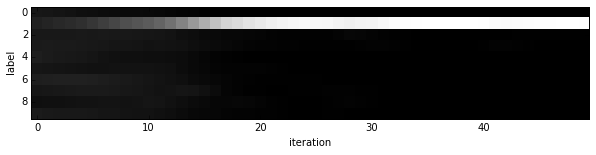

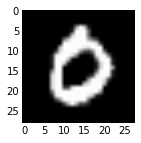

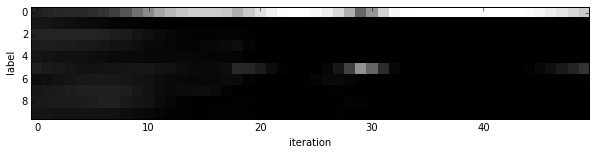

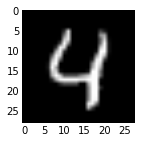

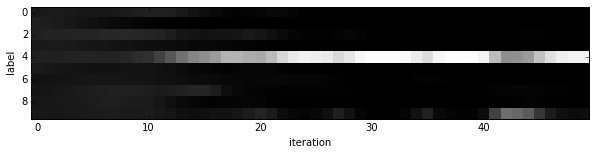

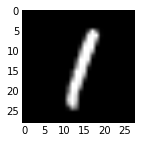

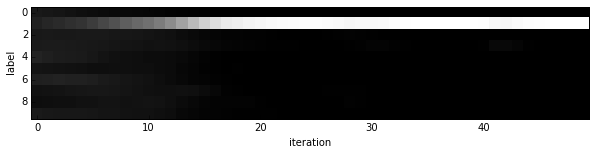

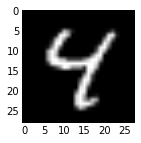

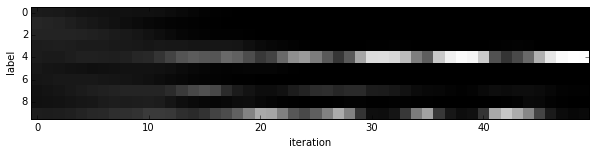

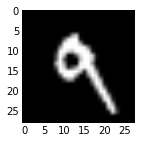

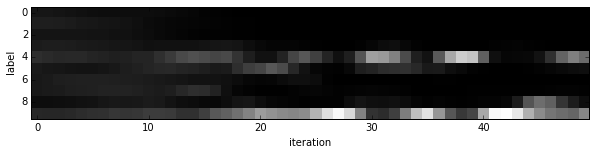

In [18]:
for i in range(8):
    figure(figsize=(2, 2))
    imshow(solver.test_nets[0].blobs['data'].data[i, 0], cmap='gray')
    figure(figsize=(10, 2))
    imshow(exp(output[:50, i].T) / exp(output[:50, i].T).sum(0), interpolation='nearest', cmap='gray')
    xlabel('iteration')
    ylabel('label')